# Linear regression - that a chid can do

## Import libraries
These are tools we use. Without them, we would have a lot a lot more code to write, which we don't want.  The trick is to stand on the shoulders of giants. 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
pd.options.display.float_format = '{:20,.3f}'.format

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error, r2_score, mean_squared_error

In [4]:
np.set_printoptions(precision=2,
                       threshold=10000,
                       linewidth=150,
                       suppress=True)

## Load data

In [5]:
from sklearn.datasets import load_boston
dataset = load_boston()

### - Data background
- super clean, super meaningful features for the era (most real world data is very far from this)
- it was well prepared by economists

###  - Feature names
- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: Nitric oxide concentration (parts per 10 million)
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: Full-value property tax rate per 10,000
- PTRATIO: Pupil-teacher ratio by town
- B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
- LSTAT: Percentage of lower status of the population
- MEDV: this is in dataset.target, which is the median value of owner-occupied homes in $1000s

In [6]:
y = dataset.target
y.shape

(506,)

In [7]:
X = dataset.data
X

array([[  0.01,  18.  ,   2.31,   0.  ,   0.54,   6.58,  65.2 ,   4.09,   1.  , 296.  ,  15.3 , 396.9 ,   4.98],
       [  0.03,   0.  ,   7.07,   0.  ,   0.47,   6.42,  78.9 ,   4.97,   2.  , 242.  ,  17.8 , 396.9 ,   9.14],
       [  0.03,   0.  ,   7.07,   0.  ,   0.47,   7.18,  61.1 ,   4.97,   2.  , 242.  ,  17.8 , 392.83,   4.03],
       [  0.03,   0.  ,   2.18,   0.  ,   0.46,   7.  ,  45.8 ,   6.06,   3.  , 222.  ,  18.7 , 394.63,   2.94],
       [  0.07,   0.  ,   2.18,   0.  ,   0.46,   7.15,  54.2 ,   6.06,   3.  , 222.  ,  18.7 , 396.9 ,   5.33],
       [  0.03,   0.  ,   2.18,   0.  ,   0.46,   6.43,  58.7 ,   6.06,   3.  , 222.  ,  18.7 , 394.12,   5.21],
       [  0.09,  12.5 ,   7.87,   0.  ,   0.52,   6.01,  66.6 ,   5.56,   5.  , 311.  ,  15.2 , 395.6 ,  12.43],
       [  0.14,  12.5 ,   7.87,   0.  ,   0.52,   6.17,  96.1 ,   5.95,   5.  , 311.  ,  15.2 , 396.9 ,  19.15],
       [  0.21,  12.5 ,   7.87,   0.  ,   0.52,   5.63, 100.  ,   6.08,   5.  , 311.  ,  15.2 , 

## split data

In [8]:
from sklearn.model_selection import train_test_split
# 20-80 split for test- train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


## Modelling

<div class="alert alert-block alert-info"> <b>To change algorithm: </b> just change the following two lines</div>

In [9]:
from sklearn.linear_model import RidgeCV
my_regr = RidgeCV()

In [10]:
my_regr.fit(X_train, y_train)
y_pred =my_regr.predict(X_test)

In [11]:
my_regr.coef_

array([ -0.13,   0.05,  -0.  ,   2.67, -14.67,   3.42,   0.  ,  -1.47,   0.36,  -0.01,  -0.94,   0.01,  -0.6 ])

In [12]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

(0, 50)

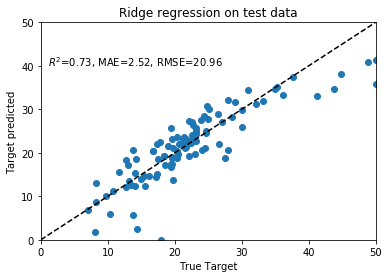

In [13]:
f, ax =plt.subplots(1, 1)
ax.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--k')
ax.set_ylabel('Target predicted')
ax.set_xlabel('True Target')
ax.set_title('Ridge regression on test data')
ax.text(1, 40, r'$R^2$=%.2f, MAE=%.2f, RMSE=%.2f' % (
    r2_score(y_test, y_pred), median_absolute_error(y_test, y_pred),mean_squared_error(y_test, y_pred)))
ax.set_xlim([0, 50])
ax.set_ylim([0, 50])


(0, 50)

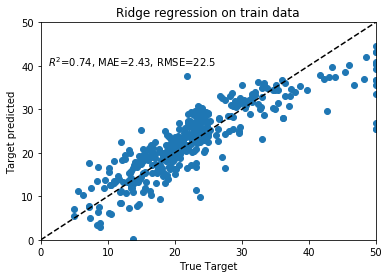

In [15]:
y_pred =my_regr.predict(X_train)
f, ax =plt.subplots(1, 1)
ax.scatter(y_train, y_pred)
plt.plot([0, 50], [0, 50], '--k')
ax.set_ylabel('Target predicted')
ax.set_xlabel('True Target')
ax.set_title('Ridge regression on train data')
ax.text(1, 40, r'$R^2$=%.2f, MAE=%.2f, RMSE=%.1f' % (
    r2_score(y_train, y_pred), median_absolute_error(y_train, y_pred),mean_squared_error(y_train, y_pred)))
ax.set_xlim([0, 50])
ax.set_ylim([0, 50])

In [16]:
interpretation = pd.DataFrame({'X': dataset.feature_names, 'coef': my_regr.coef_,'desc':['CRIM: Per capita crime rate by town',
'ZN: Proportion of residential land zoned for lots over 25,000 sq. ft',
'INDUS: Proportion of non-retail business acres per town',
'CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
'NOX: Nitric oxide concentration (parts per 10 million)',
'RM: Average number of rooms per dwelling',
'AGE: Proportion of owner-occupied units built prior to 1940',
'DIS: Weighted distances to five Boston employment centers',
'RAD: Index of accessibility to radial highways',
'TAX: Full-value property tax rate per $10,000',
'PTRATIO: Pupil-teacher ratio by town',
'B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town',
'LSTAT: Percentage of lower status of the population'
],'Comment':['intuitive','intuitive', 'not sure','intuitive, next to river will have higher price','intuitive','intuitive, more rooms will have higher price',
             'not sure, could mean historic buildings','intuitive, the longer the distance, the lower the price',
            'intuitive, more convenience more value','not sure about tax rate', 'intuitive, the lower the ratio, the higher value', 
            'intuitive, unfortunately the fewer blacks the higher value',
            'intuitive']})
interpretation

,X,coef,desc,Comment
0,CRIM,-0.130,CRIM: Per capita crime rate by town,intuitive
1,ZN,0.050,ZN: Proportion of residential land zoned for l...,intuitive
2,INDUS,-0.004,INDUS: Proportion of non-retail business acres...,not sure
3,CHAS,2.675,CHAS: Charles River dummy variable (= 1 if tra...,"intuitive, next to river will have higher price"
4,NOX,-14.667,NOX: Nitric oxide concentration (parts per 10 ...,intuitive
5,RM,3.418,RM: Average number of rooms per dwelling,"intuitive, more rooms will have higher price"
6,AGE,0.000,AGE: Proportion of owner-occupied units built ...,"not sure, could mean historic buildings"
7,DIS,-1.474,DIS: Weighted distances to five Boston employm...,"intuitive, the longer the distance, the lower ..."
8,RAD,0.362,RAD: Index of accessibility to radial highways,"intuitive, more convenience more value"
9,TAX,-0.013,"TAX: Full-value property tax rate per $10,000",not sure about tax rate


### Performance is reasonably good given strong features and well-prepared data.   Parameters coefficients are intuitive as well. 

### Now we need statistically significance :)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

<div class="alert alert-block alert-info"><b>RidgeCV</b>(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False) </div>

## Documentation on RidgeCV
- By default, it performs Generalized Cross-Validation, which is a form of efficient Leave-One-Out cross-validation.
- alphas : numpy array of shape [n_alphas]
    Array of alpha values to try.
    Regularization strength; must be a positive float. Regularization
    improves the conditioning of the problem and reduces the variance of
    the estimates. Larger values specify stronger regularization.
    Alpha corresponds to ``C^-1`` in other linear models such as
    LogisticRegression or LinearSVC.

- fit_intercept : boolean
    Whether to calculate the intercept for this model. If set
    to false, no intercept will be used in calculations
    (e.g. data is expected to be already centered).

- normalize : boolean, optional, default False
    This parameter is ignored when ``fit_intercept`` is set to False.
    If True, the regressors X will be normalized before regression by
    subtracting the mean and dividing by the l2-norm.
    If you wish to standardize, please use
    :class:`sklearn.preprocessing.StandardScaler` before calling ``fit``
    on an estimator with ``normalize=False``.

- scoring : string, callable or None, optional, default: None
    A string (see model evaluation documentation) or
    a scorer callable object / function with signature
    ``scorer(estimator, X, y)``.

- cv : int, cross-validation generator or an iterable, optional
    Determines the cross-validation splitting strategy.
    Possible inputs for cv are:

    - None, to use the efficient Leave-One-Out cross-validation
    - integer, to specify the number of folds.
    - :term:`CV splitter`,
    - An iterable yielding (train, test) splits as arrays of indices.

    For integer/None inputs, if ``y`` is binary or multiclass,
    :class:`sklearn.model_selection.StratifiedKFold` is used, else,
    :class:`sklearn.model_selection.KFold` is used.

    Refer :ref:`User Guide <cross_validation>` for the various
    cross-validation strategies that can be used here.

gcv_mode : {None, 'auto', 'svd', eigen'}, optional
    Flag indicating which strategy to use when performing
    Generalized Cross-Validation. Options are::

        'auto' : use svd if n_samples > n_features or when X is a sparse
                 matrix, otherwise use eigen
        'svd' : force computation via singular value decomposition of X
                (does not work for sparse matrices)
        'eigen' : force computation via eigendecomposition of X^T X

    The 'auto' mode is the default and is intended to pick the cheaper
    option of the two depending upon the shape and format of the training
    data.

- store_cv_values : boolean, default=False
    Flag indicating if the cross-validation values corresponding to
    each alpha should be stored in the ``cv_values_`` attribute (see
    below). This flag is only compatible with ``cv=None`` (i.e. using
    Generalized Cross-Validation).




<div class="alert alert-block alert-info"> <b>To change algorithm: </b> just change the following two lines</div>

## linear regression with 10 fold cross validation

In [17]:
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model

In [18]:
my_regr = linear_model.LinearRegression()
y_pred = cross_val_predict(my_regr, X, y, cv=10) # cross_val_predict returns an array of the same size as `y` where each entry is a prediction obtained by cross validation:

Text(1,45,'$R^2$=0.59, MAE=2.83, RMSE=34.5')

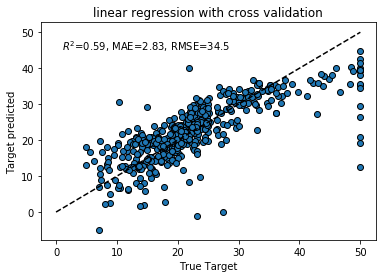

In [19]:
f, ax =plt.subplots(1, 1)
ax.scatter(y, y_pred, edgecolors=(0, 0, 0))
plt.plot([0, 50], [0, 50], '--k')
ax.set_ylabel('Target predicted')
ax.set_xlabel('True Target')
ax.set_title('linear regression with cross validation')
ax.text(1, 45, r'$R^2$=%.2f, MAE=%.2f, RMSE=%.1f' % (
    r2_score(y, y_pred), median_absolute_error(y, y_pred), mean_squared_error(y, y_pred)))

<div class="alert alert-block alert-warning"><b>Comparison </b> RidgeCV produces a lot better performance than linear regression with cross validation.</div>

## linear regression using train/ test data split
We know that the dataset is very small and it is more appropriate to use cross validation.  But we will try train-test split just out of curiosity. 

<div class="alert alert-block alert-info"> <b>To change algorithm: </b> just change the following two lines</div>

In [20]:
my_regr = linear_model.LinearRegression()
my_regr.fit(X_train, y_train)
y_pred = my_regr.predict(X_test)

In [21]:
X_test.shape

(102, 13)

(0, 50)

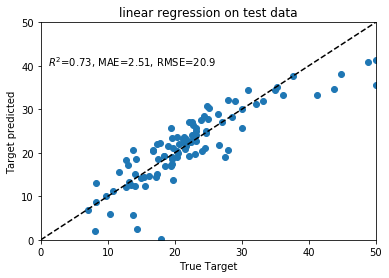

In [22]:
f, ax =plt.subplots(1, 1)
ax.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--k')
ax.set_ylabel('Target predicted')
ax.set_xlabel('True Target')
ax.set_title('linear regression on test data')
ax.text(1, 40, r'$R^2$=%.2f, MAE=%.2f, RMSE=%.1f' % (
    r2_score(y_test, y_pred), median_absolute_error(y_test, y_pred),mean_squared_error(y_test,y_pred)))
ax.set_xlim([0, 50])
ax.set_ylim([0, 50])

<div class="alert alert-block alert-warning"><b>Comparison: </b> RidgeCV produces a lot better performance than linear regression with train-test split, which is better than linear regression with cross validation for this data.</div>